# 여자배구 EDA

## 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display, HTML
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 8) # 그래프 크기 설정

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

warnings.filterwarnings('ignore') # 경고 무시

pd.set_option('display.max_rows', None)
display.max_rows = False


## 데이터 불러오기

### 경기_시즌별 데이터 불러오기

In [2]:
경기_시즌별 = pd.read_csv("./경기_시즌별.csv", encoding='utf8')
경기_시즌별

,Unnamed: 0,시즌,팀명,총경기수,이긴경기,승률,공격종합_성공률,오픈_성공률,시간차_성공률,이동_성공률,후위_성공률,속공_성공률,퀵오픈_성공률,서브_성공률,디그_성공,세트_성공,리시브_정확,블로킹_성공
0,0,17-18,IBK기업은행,36,21,58.333333,21.541927,18.708620,12.508099,8.743151,7.450573,7.444193,16.925208,0.124089,7.679688,4.846354,2.841146,0.765625
1,1,17-18,현대건설,33,15,45.454545,25.670598,20.193588,16.616877,2.613522,7.148339,10.821860,15.376312,0.146512,8.518272,5.302326,3.524917,1.189369
2,2,17-18,한국도로공사,33,24,72.727273,22.989708,18.414430,15.168594,8.311963,6.456631,8.244828,15.812387,0.112759,7.291777,4.687003,3.381963,0.779841
3,3,17-18,흥국생명,30,11,36.666667,18.930973,15.827432,9.181135,4.907649,5.510054,5.772135,10.157243,0.098811,6.883784,3.932432,2.872973,0.548649
4,4,17-18,KGC인삼공사,30,12,40.000000,21.380336,19.377951,10.874159,2.854190,4.692232,7.619235,13.352722,0.087554,7.556575,4.204893,2.874618,0.746177
5,5,17-18,GS칼텍스,30,13,43.333333,21.447119,18.392715,8.428726,1.315789,6.101884,6.984294,12.589224,0.118227,6.462604,4.448753,2.855956,0.590028
6,0,18-19,한국도로공사,37,25,67.567568,24.038621,20.228341,13.902944,8.423341,5.769276,8.022360,14.526262,0.077967,7.677570,4.675234,3.605140,0.771028
7,1,18-19,흥국생명,34,22,64.705882,21.794680,19.584910,12.593453,4.473325,6.642916,7.107187,10.681125,0.091355,7.465473,4.480818,2.984655,0.728900
8,2,18-19,GS칼텍스,33,16,48.484848,21.434354,18.312101,7.172987,1.316456,6.297544,6.985367,14.295468,0.098354,6.726582,4.326582,2.716456,0.688608
9,3,18-19,IBK기업은행,30,17,56.666667,22.056716,18.953462,12.347189,5.427604,4.876982,9.011923,14.058876,0.110266,7.494083,4.573964,3.144970,0.792899


### 시즌_선수별 데이터 불러오기

In [3]:
시즌_선수별 = pd.read_csv("./시즌별_선수데이터.csv", encoding='utf8')
시즌_선수별

,Unnamed: 0,시즌,팀명,이름,포지션,결과,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,...,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,디그_성공률,세트_성공률,리시브_정확률,블로킹_성공률
0,0,17-18,GS칼텍스,강소휘 (L),L,0,18.117647,41.882353,15.470588,2.647059,...,0.176471,0.262941,13.216471,0.705882,0.0,5.647059,90.418723,14.705882,41.394651,12.726848
1,1,17-18,GS칼텍스,강소휘 (L),L,1,17.230769,39.000000,15.076923,2.076923,...,0.076923,0.326923,13.044615,1.076923,0.0,4.461538,81.101132,33.730159,40.937985,14.289599
2,2,17-18,GS칼텍스,김유리 (C),C,0,4.312500,8.875000,3.062500,0.500000,...,0.187500,0.328125,23.379375,1.250000,0.0,1.312500,79.333333,27.083333,0.000000,8.101021
3,3,17-18,GS칼텍스,김유리 (C),C,1,6.083333,9.500000,4.083333,0.666667,...,0.166667,0.352500,17.024167,1.333333,0.0,1.750000,87.222222,26.190476,100.000000,10.525050
4,4,17-18,GS칼텍스,김진희 (L),L,0,2.076923,5.230769,1.769231,0.461538,...,0.076923,0.015385,4.340769,0.153846,0.0,1.846154,67.142857,14.375000,34.039274,3.125000
5,5,17-18,GS칼텍스,김진희 (L),L,1,2.000000,3.250000,1.250000,0.500000,...,0.250000,0.082500,3.017500,0.000000,0.0,1.250000,86.666667,44.444444,30.000000,7.142857
6,6,17-18,GS칼텍스,김채원 (L),L,0,0.083333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,67.857143,25.000000,42.708333,0.000000
7,7,17-18,GS칼텍스,김채원 (L),L,1,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.200000,80.208333,16.666667,16.666667,0.000000
8,8,17-18,GS칼텍스,김현정 (C),C,0,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,2.415000,0.000000,0.0,0.250000,66.666667,0.000000,0.000000,0.000000
9,9,17-18,GS칼텍스,김현정 (C),C,1,0.333333,0.222222,0.111111,0.000000,...,0.000000,0.074444,1.494444,0.000000,0.0,0.111111,50.000000,0.000000,0.000000,25.000000


# 팀별 공격 종류별 성공률 비교 EDA  
### - **목적 : 팀 별 승률과 관련있는 주요 공격 종류를 찾아 특정 팀의 특성과 전력 분석하기 위함**  

공격자 위치에 따라 오픈공격 성공률과 속공 성공률, 후위 성공률을 살펴봄  

승률을 높이기 위해서는 공격 유형 중 특히 오픈공격과 후위공격의 성공률이 높아야 하는데   
이를 위해서는 공격 능력이 뛰어난 레프트나 라이트 포지션의 주공격수가 있어야 하고    
속공공격과 블로킹을 담당하는 센터의 역할이 중요하다  

# 현대건설 승률과 공격 종류별 시각화
## 주요 포지션별 주 공격 성공률

Text(0, 0.5, '승률 및 성공률')

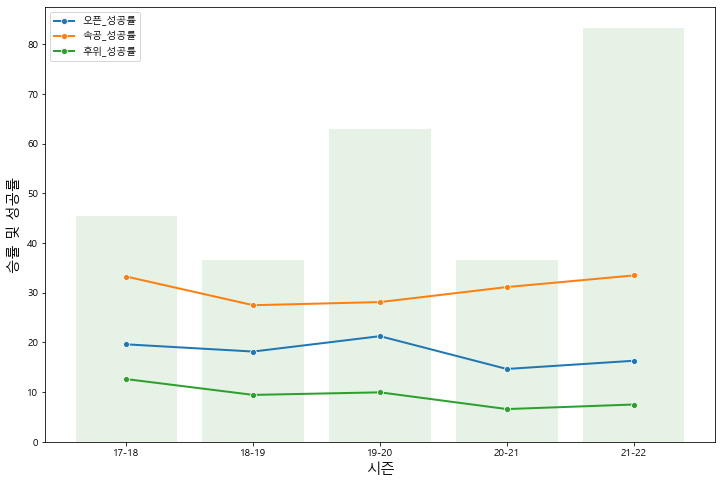

In [5]:
hd = 경기_시즌별[경기_시즌별["팀명"] == '현대건설']
hdr = 시즌_선수별[ (시즌_선수별["포지션"] == 'L') | (시즌_선수별["포지션"] == 'R') ] # 레프트 & 라이트
hdr = hdr[hdr["팀명"]== '현대건설'].groupby("시즌").mean()
hdc = 시즌_선수별[시즌_선수별["포지션"] == 'C']  # 센터
hdc = hdc[hdc["팀명"]== '현대건설'].groupby("시즌").mean()


plt.bar(hd["시즌"], hd["승률"],color='green',alpha=0.10)
sns.lineplot(data=hdr, x="시즌" ,y="오픈_성공률",label="오픈_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=hdc, x="시즌" ,y="속공_성공률",label="속공_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=hdr, x="시즌" ,y="후위_성공률",label="후위_성공률",marker='o',linewidth=2.0)
plt.xlabel('시즌',size="x-large")
plt.ylabel('승률 및 성공률',size="x-large")

**센터가 강한 팀인 현대건설은 속공의 성공률이 승률과 연관성이 있음을 확인 가능**  
**주요 경기인 오픈과 후위 공격 역시 승률 그래프와 유사도 보임**

## 세터의 세트 성공률
공격자에게 공을 올려주는 세터의 역할 역시 경기 운영에 중요한 영향을 미친다  

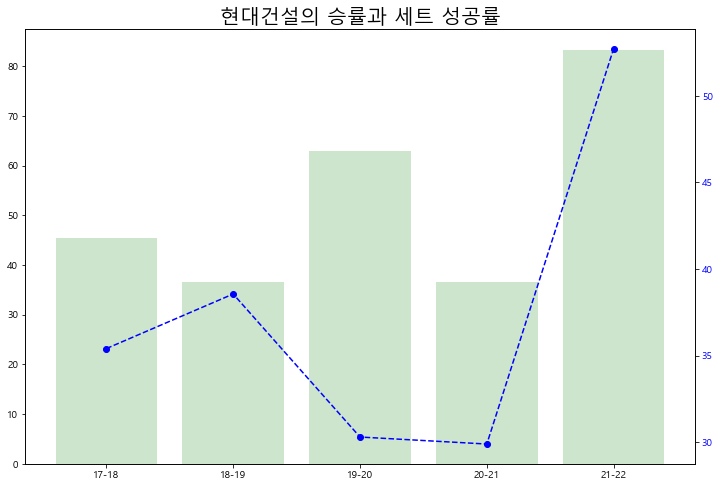

In [6]:
hds = 시즌_선수별[시즌_선수별["포지션"] == 'S']  # 세터
hds = hds[hds["팀명"]== '현대건설'].groupby("시즌").mean()

fig = plt.figure(figsize=(12,8))     # Figure 생성 
fig.set_facecolor('white')           # Figure 배경색 지정
ax1 = fig.add_subplot()              # axes 생성
 
xtick_label_position = list(range(len(hd["시즌"])))     # x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position)                    # x축 눈금 
ax1.set_xticklabels(hd["시즌"])                         # x축 눈금 라벨
ax1.bar(xtick_label_position, hd["승률"], color="green",alpha=0.20) # 바차트 출력
 
# 속공 성공 라인
ax2 = ax1.twinx() # 새로운 axis 생성
ax2.plot(xtick_label_position, hds["세트_성공률"], color='blue', linestyle='--', marker='o') # 선 그래프 
ax2.tick_params(axis='y', labelcolor='blue') # 눈금 라벨 색상 지정

plt.title('현대건설의 승률과 세트 성공률', fontsize=20)
plt.show()

* 20-21시즌의 승률이 눈에 띄게 증가했고 세트 성공률 역시 약 20% 포인트 증가함

>**세터의 경기운영능력이 많이 증가함에 따라 선수들 간 호흡도 좋아져 승률에 영향을 많이 끼친 것으로 보임**

## 팀전체 주 공격 성공률

Text(0, 0.5, '승률 및 성공률')

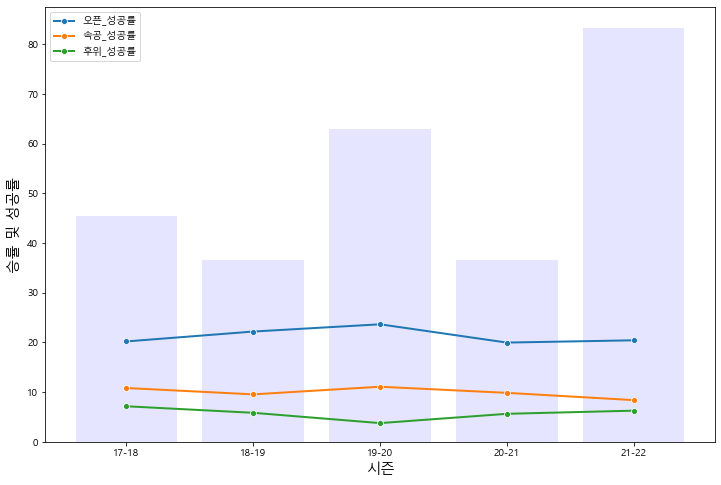

In [7]:
hd = 경기_시즌별[경기_시즌별["팀명"] == '현대건설']


plt.bar(hd["시즌"], hd["승률"],color='blue',alpha=0.10)
sns.lineplot(data=hd, x="시즌" ,y="오픈_성공률",label="오픈_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=hd, x="시즌" ,y="속공_성공률",label="속공_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=hd, x="시즌" ,y="후위_성공률",label="후위_성공률",marker='o',linewidth=2.0)
plt.xlabel('시즌',size="x-large")
plt.ylabel('승률 및 성공률',size="x-large")

# 한국도로공사 승률과 공격 종류별 시각화
## 주요 포지션 별 주 공격 성공률


Text(0, 0.5, '승률 및 성공률')

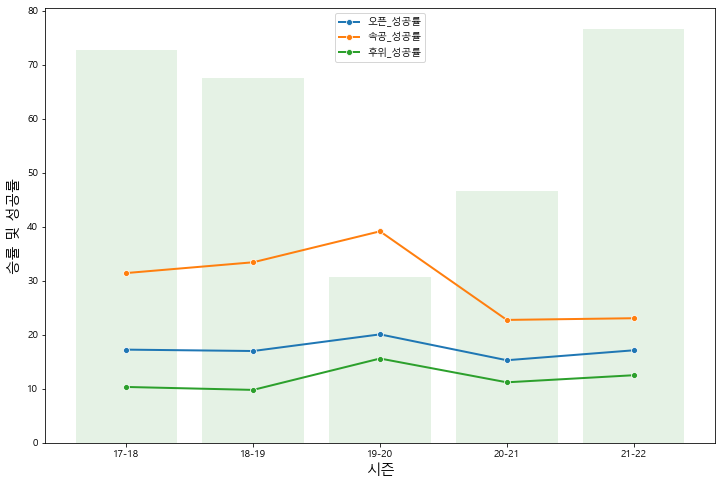

In [8]:
dg = 경기_시즌별[경기_시즌별["팀명"] == '한국도로공사']
dgr = 시즌_선수별[ (시즌_선수별["포지션"] == 'L') | (시즌_선수별["포지션"] == 'R') ] # 레프트 & 라이트
dgr = dgr[dgr["팀명"]== '한국도로공사'].groupby("시즌").mean()
dgc = 시즌_선수별[시즌_선수별["포지션"] == 'C'] # 센터
dgc = dgc[dgc["팀명"]== '한국도로공사'].groupby("시즌").mean()

plt.bar(dg["시즌"], dg["승률"],color='green',alpha=0.10)
sns.lineplot(data=dgr, x="시즌" ,y="오픈_성공률",label="오픈_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=dgc, x="시즌" ,y="속공_성공률",label="속공_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=dgr, x="시즌" ,y="후위_성공률",label="후위_성공률",marker='o',linewidth=2.0)
plt.xlabel('시즌',size="x-large")
plt.ylabel('승률 및 성공률',size="x-large")

**19-20 시즌을 살펴보면 오픈 / 속공 / 후위 성공률은 수치 중 가장 높으나 승률은 가장 낮은 것을 확인 가능**

**속공 그래프와 승률 그래프가 유사하지 않는 것으로 확인 가능**  
**오픈과 후위는 승률 그래프와 유사**

## 세터의 세트 성공률
공격자에게 공을 올려주는 세터의 역할 역시 경기 운영에 중요한 영향을 미친다  

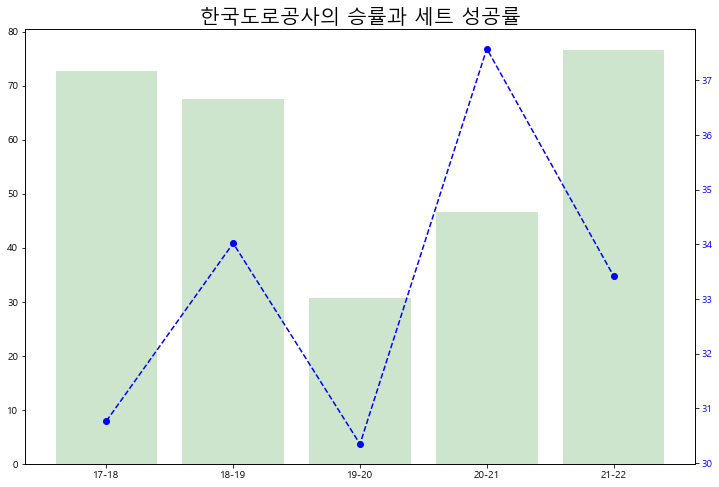

In [9]:
dgs = 시즌_선수별[시즌_선수별["포지션"] == 'S']  # 세터
dgs = dgs[dgs["팀명"]== '한국도로공사'].groupby("시즌").mean()

fig = plt.figure(figsize=(12,8))     # Figure 생성 
fig.set_facecolor('white')           # Figure 배경색 지정
ax1 = fig.add_subplot()              # axes 생성
 
xtick_label_position = list(range(len(dg["시즌"])))     # x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position)                    # x축 눈금 
ax1.set_xticklabels(dg["시즌"])                         # x축 눈금 라벨
ax1.bar(xtick_label_position, dg["승률"], color="green",alpha=0.20) # 바차트 출력
 
# 세트 성공 라인
ax2 = ax1.twinx() # 새로운 axis 생성
ax2.plot(xtick_label_position, dgs["세트_성공률"], color='blue', linestyle='--', marker='o') # 선 그래프 
ax2.tick_params(axis='y', labelcolor='blue') # 눈금 라벨 색상 지정

plt.title('한국도로공사의 승률과 세트 성공률', fontsize=20)
plt.show()

* 19-20시즌의 세트 성공률이 현저히 낮은 것을 확인할 수 있다. 

> **위에서 19-20시즌 공격 포지션들의 공격 성공률은 높았으나, 승률이 낮았던 이유를 세터의 능력부족으로 유추 가능.**

## 팀 공격 성공률

Text(0, 0.5, '승률 및 성공률')

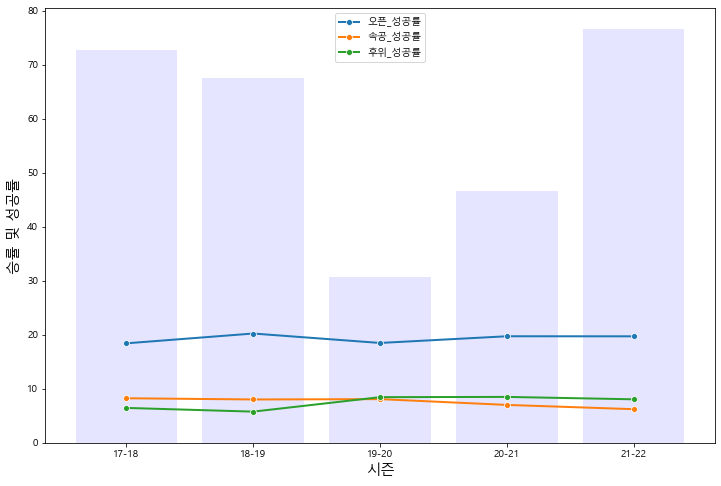

In [307]:
dg = 경기_시즌별[경기_시즌별["팀명"] == '한국도로공사']


plt.bar(dg["시즌"], dg["승률"],color='blue',alpha=0.10)
sns.lineplot(data=dg, x="시즌" ,y="오픈_성공률",label="오픈_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=dg, x="시즌" ,y="속공_성공률",label="속공_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=dg, x="시즌" ,y="후위_성공률",label="후위_성공률",marker='o',linewidth=2.0)
plt.xlabel('시즌',size="x-large")
plt.ylabel('승률 및 성공률',size="x-large")

# GS칼텍스 승률과 공격 종류별 시각화
## 주요 포지션별 주 공격 성공률

Text(0, 0.5, '승률 및 성공률')

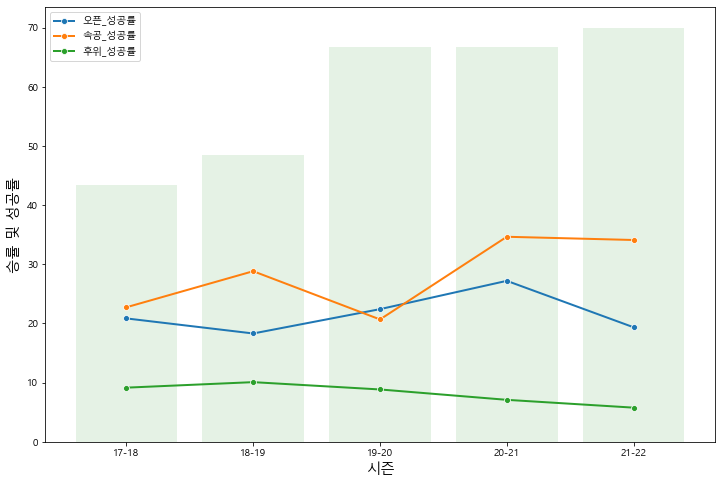

In [308]:
gs = 경기_시즌별[경기_시즌별["팀명"] == 'GS칼텍스']
gsr = 시즌_선수별[ (시즌_선수별["포지션"] == 'L') | (시즌_선수별["포지션"] == 'R') ] # 레프트 & 라이트
gsr = gsr[gsr["팀명"]== 'GS칼텍스'].groupby("시즌").mean()
gsc = 시즌_선수별[시즌_선수별["포지션"] == 'C'] # 센터
gsc = gsc[gsc["팀명"]== 'GS칼텍스'].groupby("시즌").mean()


plt.bar(gs["시즌"], gs["승률"],color='green',alpha=0.10)
sns.lineplot(data=gsr, x="시즌" ,y="오픈_성공률",label="오픈_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=gsc, x="시즌" ,y="속공_성공률",label="속공_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=gsr, x="시즌" ,y="후위_성공률",label="후위_성공률",marker='o',linewidth=2.0)
plt.xlabel('시즌',size="x-large")
plt.ylabel('승률 및 성공률',size="x-large")

**속공의 성공률은 기복이 크고 승률과 연관성이 없는 것으로 보임**  
**후위 성공률은 최근 세 시즌은 감소하는 추세**  
**오픈 성공률 역시 승률과 연관성이 없어 보임**  

## 세터의 세트 성공률
공격자에게 공을 올려주는 세터의 역할 역시 경기 운영에 중요한 영향을 미친다    

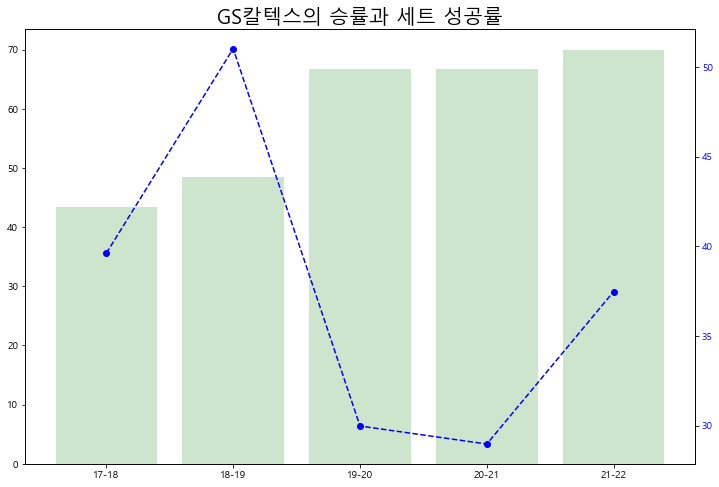

In [309]:
gss = 시즌_선수별[시즌_선수별["포지션"] == 'S']  # 세터
gss = gss[gss["팀명"]== 'GS칼텍스'].groupby("시즌").mean()

fig = plt.figure(figsize=(12,8))     # Figure 생성 
fig.set_facecolor('white')           # Figure 배경색 지정
ax1 = fig.add_subplot()              # axes 생성
 
xtick_label_position = list(range(len(gs["시즌"])))     # x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position)                    # x축 눈금 
ax1.set_xticklabels(gs["시즌"])                         # x축 눈금 라벨
ax1.bar(xtick_label_position, gs["승률"], color="green",alpha=0.20) # 바차트 출력
 
# 세트 성공 라인
ax2 = ax1.twinx() # 새로운 axis 생성
ax2.plot(xtick_label_position, gss["세트_성공률"], color='blue', linestyle='--', marker='o') # 선 그래프 
ax2.tick_params(axis='y', labelcolor='blue') # 눈금 라벨 색상 지정

plt.title('GS칼텍스의 승률과 세트 성공률', fontsize=20)
plt.show()

* GS칼텍스의 승률과 세트 성공률은 유사하지않음  
* GS칼텍스는 수치상으로 공격과 세터의 능력 중 승률에 눈에 띄게 영향을 미치는 요소가 확인이 되지 않음
> GS칼텍스의 전반적인 경기 흐름과 선수들의 합이 좋은 것으로 유추 가능

## 팀 공격 성공률

Text(0, 0.5, '승률 및 성공률')

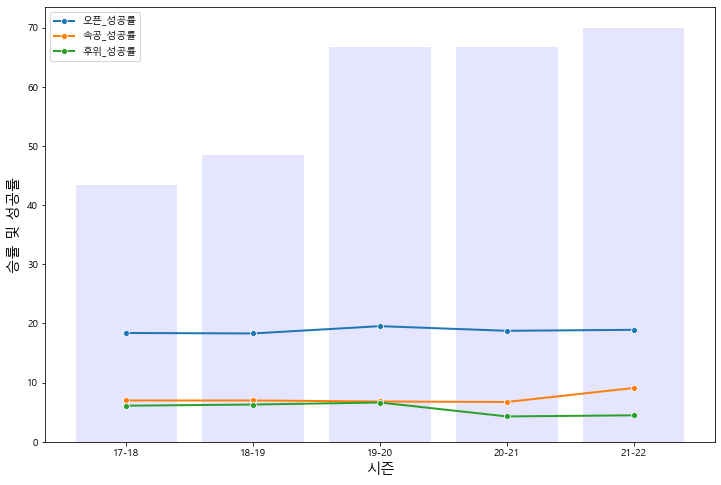

In [310]:
gs = 경기_시즌별[경기_시즌별["팀명"] == 'GS칼텍스']


plt.bar(gs["시즌"], gs["승률"],color='blue',alpha=0.10)
sns.lineplot(data=gs, x="시즌" ,y="오픈_성공률",label="오픈_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=gs, x="시즌" ,y="속공_성공률",label="속공_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=gs, x="시즌" ,y="후위_성공률",label="후위_성공률",marker='o',linewidth=2.0)
plt.xlabel('시즌',size="x-large")
plt.ylabel('승률 및 성공률',size="x-large")

# KGC인삼공사 승률과 공격 종류별 연관관계
## 주요 포지션별 주 공격 성공률

Text(0, 0.5, '승률 및 성공률')

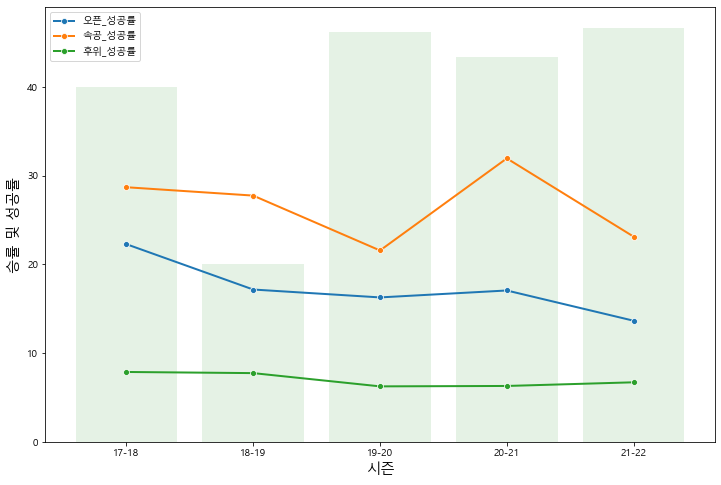

In [311]:
kgc = 경기_시즌별[경기_시즌별["팀명"] == 'KGC인삼공사']
kgcr = 시즌_선수별[ (시즌_선수별["포지션"] == 'L') | (시즌_선수별["포지션"] == 'R') ] # 레프트 & 라이트
kgcr = kgcr[kgcr["팀명"]== 'KGC인삼공사'].groupby("시즌").mean()
kgcc = 시즌_선수별[시즌_선수별["포지션"] == 'C'] # 센터
kgcc = kgcc[kgcc["팀명"]== 'KGC인삼공사'].groupby("시즌").mean()

plt.bar(kgc["시즌"], kgc["승률"],color='green',alpha=0.10)
sns.lineplot(data=kgcr, x="시즌" ,y="오픈_성공률",label="오픈_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=kgcc, x="시즌" ,y="속공_성공률",label="속공_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=kgcr, x="시즌" ,y="후위_성공률",label="후위_성공률",marker='o',linewidth=2.0)
plt.xlabel('시즌',size="x-large")
plt.ylabel('승률 및 성공률',size="x-large")

**18-19시즌 승률이 낮아진 것에서 오픈 성공률의 그래프 감소축을 보면 오픈 공격의 영향이 컸음을 확인 가능**  
**20-21시즌 승률은 낮지만 속공과 오픈 성공률은 높음**  

## 세터의 세트 성공률
공격자에게 공을 올려주는 세터의 역할 역시 경기 운영에 중요한 영향을 미친다    

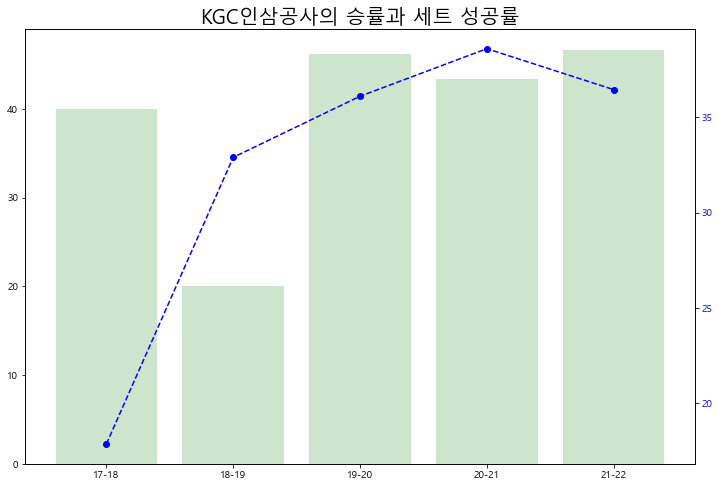

In [312]:
kgcs = 시즌_선수별[시즌_선수별["포지션"] == 'S']  # 세터
kgcs = kgcs[kgcs["팀명"]== 'KGC인삼공사'].groupby("시즌").mean()

fig = plt.figure(figsize=(12,8))     # Figure 생성 
fig.set_facecolor('white')           # Figure 배경색 지정
ax1 = fig.add_subplot()              # axes 생성
# colors = sns.color_palette('Set3',1) # 바 차트 색상
 
xtick_label_position = list(range(len(kgc["시즌"])))     # x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position)                     # x축 눈금 
ax1.set_xticklabels(kgc["시즌"])                         # x축 눈금 라벨
ax1.bar(xtick_label_position, kgc["승률"], color="green",alpha=0.20) # 바차트 출력
 
# 세트 성공 라인
ax2 = ax1.twinx() # 새로운 axis 생성
ax2.plot(xtick_label_position, kgcs["세트_성공률"], color='blue', linestyle='--', marker='o') # 선 그래프 
ax2.tick_params(axis='y', labelcolor='blue') # 눈금 라벨 색상 지정

plt.title('KGC인삼공사의 승률과 세트 성공률', fontsize=20)
plt.show()

KGC인삼공사의 세터 능력이 과거 시즌에 비해 확연히 좋아짐을 확인 가능  

## 팀 공격 성공률

Text(0, 0.5, '승률 및 성공률')

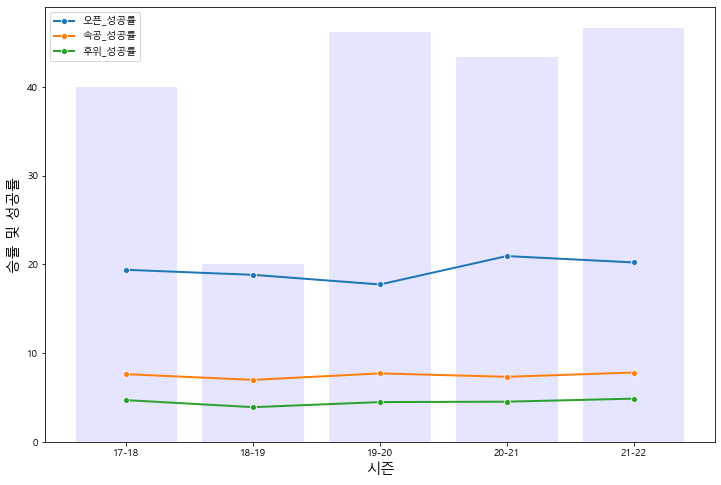

In [313]:
kgc = 경기_시즌별[경기_시즌별["팀명"] == 'KGC인삼공사']

plt.bar(kgc["시즌"], kgc["승률"],color='blue',alpha=0.10)
sns.lineplot(data=kgc, x="시즌" ,y="오픈_성공률",label="오픈_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=kgc, x="시즌" ,y="속공_성공률",label="속공_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=kgc, x="시즌" ,y="후위_성공률",label="후위_성공률",marker='o',linewidth=2.0)
plt.xlabel('시즌',size="x-large")
plt.ylabel('승률 및 성공률',size="x-large")

# IBK기업은행 승률과 공격 종류별 연관관계
## 주요 포지션별 주 공격 성공률

Text(0, 0.5, '승률 및 성공률')

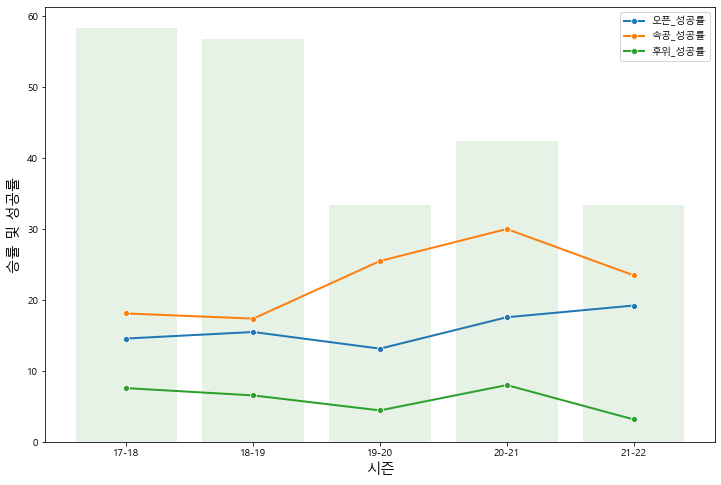

In [314]:
ibk = 경기_시즌별[경기_시즌별["팀명"] == 'IBK기업은행']
ibkr = 시즌_선수별[ (시즌_선수별["포지션"] == 'L') | (시즌_선수별["포지션"] == 'R') ] # 레프트 & 라이트
ibkr = ibkr[ibkr["팀명"]== 'IBK기업은행'].groupby("시즌").mean()
ibkc = 시즌_선수별[시즌_선수별["포지션"] == 'C'] # 센터
ibkc = ibkc[ibkc["팀명"]== 'IBK기업은행'].groupby("시즌").mean()


plt.bar(ibk["시즌"], ibk["승률"],color='green',alpha=0.10)
sns.lineplot(data=ibkr, x="시즌" ,y="오픈_성공률",label="오픈_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=ibkc, x="시즌" ,y="속공_성공률",label="속공_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=ibkr, x="시즌" ,y="후위_성공률",label="후위_성공률",marker='o',linewidth=2.0)
plt.xlabel('시즌',size="x-large")
plt.ylabel('승률 및 성공률',size="x-large")

과거 시즌에 비해 승률이 많이 떨어진 상태  
19-20과 20-21 시즌을 비교했을 때 모든 공격 성공률이 많이 좋아짐

## 세터의 세트 성공률
공격자에게 공을 올려주는 세터의 역할 역시 경기 운영에 중요한 영향을 미친다    

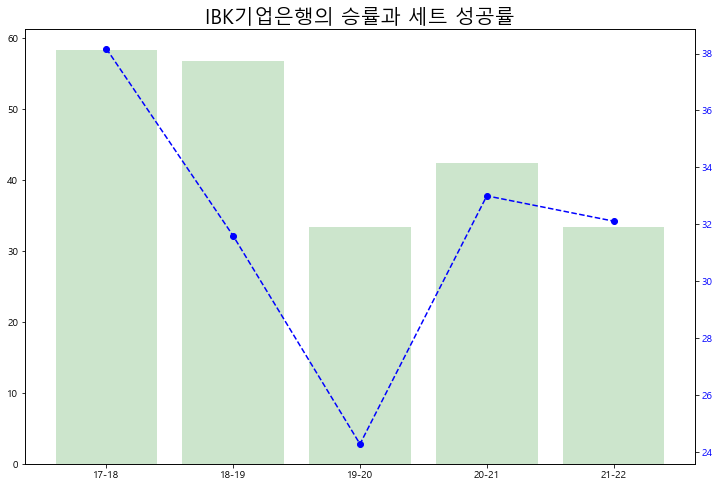

In [315]:
ibks = 시즌_선수별[시즌_선수별["포지션"] == 'S']  # 세터
ibks = ibks[ibks["팀명"]== 'IBK기업은행'].groupby("시즌").mean()

fig = plt.figure(figsize=(12,8))     # Figure 생성 
fig.set_facecolor('white')           # Figure 배경색 지정
ax1 = fig.add_subplot()              # axes 생성
# colors = sns.color_palette('Set3',1) # 바 차트 색상
 
xtick_label_position = list(range(len(ibk["시즌"])))     # x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position)                    # x축 눈금 
ax1.set_xticklabels(ibk["시즌"])                         # x축 눈금 라벨
ax1.bar(xtick_label_position, ibk["승률"], color="green",alpha=0.20) # 바차트 출력
 
# 세트 성공 라인
ax2 = ax1.twinx() # 새로운 axis 생성
ax2.plot(xtick_label_position, ibks["세트_성공률"], color='blue', linestyle='--', marker='o') # 선 그래프 
ax2.tick_params(axis='y', labelcolor='blue') # 눈금 라벨 색상 지정

plt.title('IBK기업은행의 승률과 세트 성공률', fontsize=20)
plt.show()

팀에서 세터의 능력이 기복이 많이 큰 것을 확인 가능  
가장 최근 시즌 승률을 비롯한 모든 경기 운영 요소들이 감소함

## 팀 공격 성공률

Text(0, 0.5, '승률 및 성공률')

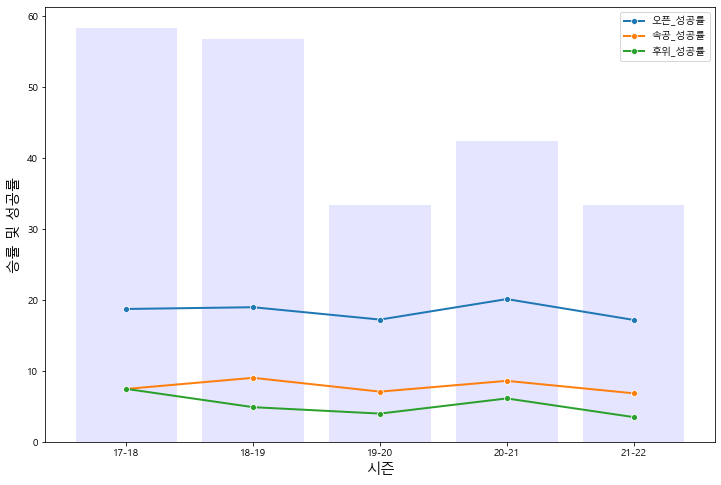

In [316]:
ibk = 경기_시즌별[경기_시즌별["팀명"] == 'IBK기업은행']


plt.bar(ibk["시즌"], ibk["승률"],color='blue',alpha=0.10)
sns.lineplot(data=ibk, x="시즌" ,y="오픈_성공률",label="오픈_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=ibk, x="시즌" ,y="속공_성공률",label="속공_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=ibk, x="시즌" ,y="후위_성공률",label="후위_성공률",marker='o',linewidth=2.0)
plt.xlabel('시즌',size="x-large")
plt.ylabel('승률 및 성공률',size="x-large")

# 흥국생명 승률과 공격 종류별 연관관계

Text(0, 0.5, '승률 및 성공률')

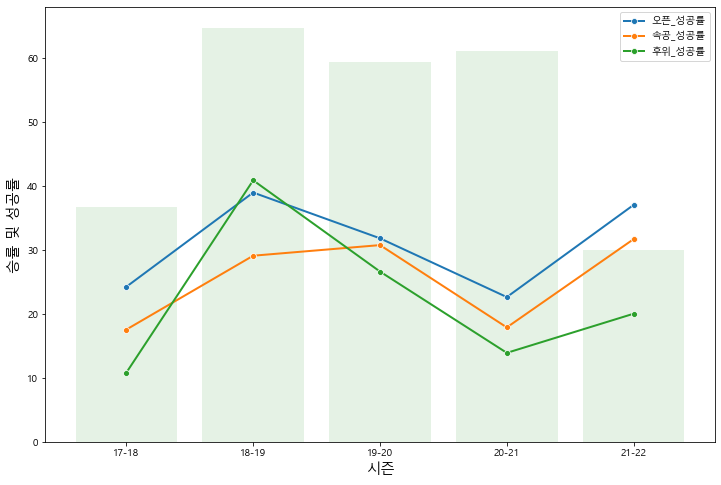

In [317]:
hk = 경기_시즌별[경기_시즌별["팀명"] == '흥국생명']
hkr = 시즌_선수별[시즌_선수별["포지션"] == 'R'] # 라이트
hkr = hkr[hkr["팀명"]== '흥국생명'].groupby("시즌").mean()
hkc = 시즌_선수별[시즌_선수별["포지션"] == 'C'] # 센터
hkc = hkc[hkc["팀명"]== '흥국생명'].groupby("시즌").mean()


plt.bar(hk["시즌"], hk["승률"],color='green',alpha=0.10)
sns.lineplot(data=hkr, x="시즌" ,y="오픈_성공률",label="오픈_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=hkc, x="시즌" ,y="속공_성공률",label="속공_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=hkr, x="시즌" ,y="후위_성공률",label="후위_성공률",marker='o',linewidth=2.0)
plt.xlabel('시즌',size="x-large")
plt.ylabel('승률 및 성공률',size="x-large")

**최근 시즌 모든 공격의 성공률이 다 높아짐**  
**그와 반대로 승률은 확연하게 떨어짐**   

## 세터의 세트 성공률
공격자에게 공을 올려주는 세터의 역할 역시 경기 운영에 중요한 영향을 미친다    

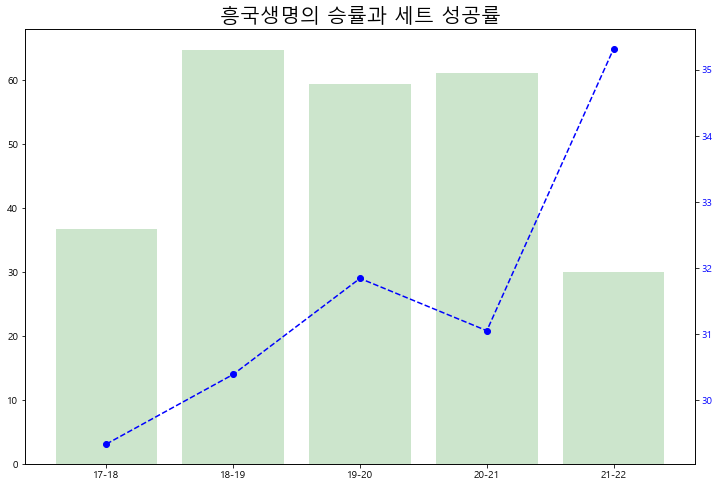

In [318]:
hks = 시즌_선수별[시즌_선수별["포지션"] == 'S']  # 세터
hks = hks[hks["팀명"]== '흥국생명'].groupby("시즌").mean()

fig = plt.figure(figsize=(12,8))     # Figure 생성 
fig.set_facecolor('white')           # Figure 배경색 지정
ax1 = fig.add_subplot()              # axes 생성
# colors = sns.color_palette('Set3',1) # 바 차트 색상

xtick_label_position = list(range(len(hk["시즌"])))     # x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position)                    # x축 눈금 
ax1.set_xticklabels(hk["시즌"])                         # x축 눈금 라벨
ax1.bar(xtick_label_position, hk["승률"], color="green",alpha=0.20) # 바차트 출력
 
# 세트 성공 라인
ax2 = ax1.twinx() # 새로운 axis 생성
ax2.plot(xtick_label_position, hks["세트_성공률"], color='blue', linestyle='--', marker='o') # 선 그래프 
ax2.tick_params(axis='y', labelcolor='blue') # 눈금 라벨 색상 지정

plt.title('흥국생명의 승률과 세트 성공률', fontsize=20)
plt.show()

세터의 세트 성공률은 최근 시즌 많이 증가했으나 승률은 낮음  

> **기존에 핵심 멤버들이 모두 팀을 나가 베테랑 선수의 부족과 스타팅 라인업의 큰변화가 영향을 끼친 것으로 보인다**

## 팀 공격 성공률

Text(0, 0.5, '승률 및 성공률')

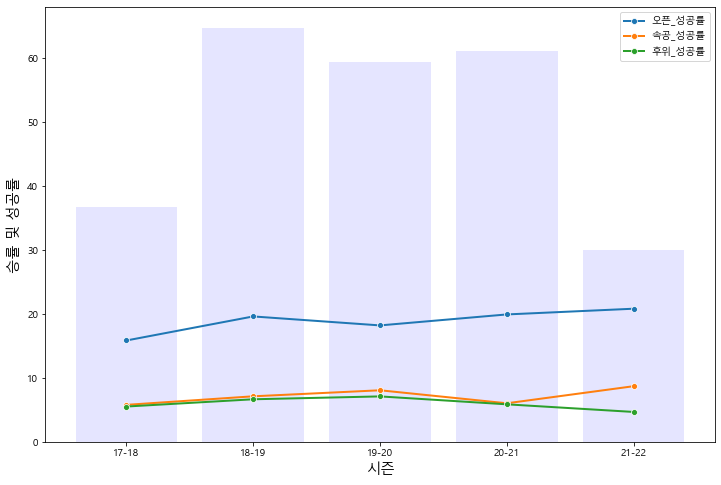

In [319]:
hk = 경기_시즌별[경기_시즌별["팀명"] == '흥국생명']


plt.bar(hg["시즌"], hg["승률"],color='blue',alpha=0.10)
sns.lineplot(data=hk, x="시즌" ,y="오픈_성공률",label="오픈_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=hk, x="시즌" ,y="속공_성공률",label="속공_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=hk, x="시즌" ,y="후위_성공률",label="후위_성공률",marker='o',linewidth=2.0)
plt.xlabel('시즌',size="x-large")
plt.ylabel('승률 및 성공률',size="x-large")